# Student performance Project

### Importing all the packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Importing data

In [2]:
cwd = os.getcwd()
data_path = os.path.join(cwd,"data","stud.csv")

In [3]:
stud_data = pd.read_csv(data_path)

In [4]:
stud_data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### EDA

In [5]:
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Gender

In [6]:
stud_data.gender.unique()
male_count = stud_data[stud_data['gender'] == 'male'].gender.count()
female_count = stud_data[stud_data['gender'] == 'female'].gender.count()

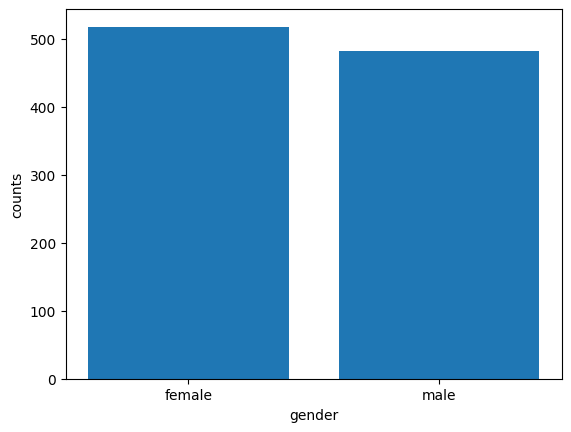

In [7]:
plt.subplot(1,1,1)

plt.bar(x=stud_data.gender.unique(),height=[female_count,male_count])

plt.xlabel('gender')
plt.ylabel('counts')
plt.show()

In [8]:
stud_data.gender.isna().sum()

0

- Gender is balanced
- Gender has no missing values

### race_ethnicity 

In [9]:
stud_data.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

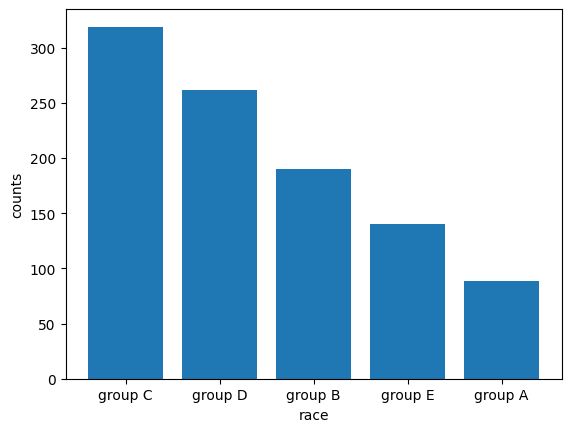

In [10]:
plt.subplot(1,1,1)

plt.bar(x=stud_data.race_ethnicity.value_counts().index,height=stud_data.race_ethnicity.value_counts())

plt.xlabel('race')
plt.ylabel('counts')
plt.show()

## parents education

Text(0, 0.5, 'counts')

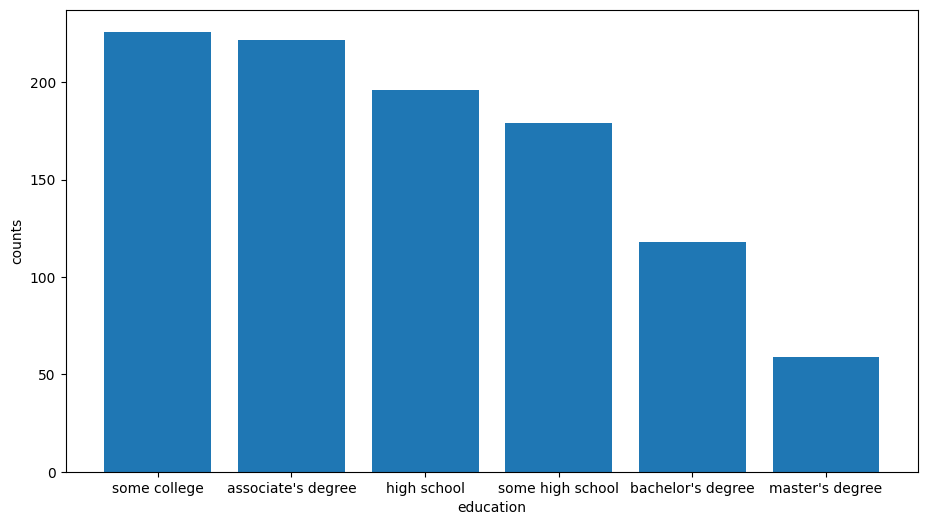

In [11]:
f,ax=plt.subplots(1,1)
f.set_size_inches(11,6)

ax.bar(x=stud_data['parental_level_of_education'].value_counts().index,height=stud_data.parental_level_of_education.value_counts())

ax.set_xlabel('education')
ax.set_ylabel('counts')


## lunch

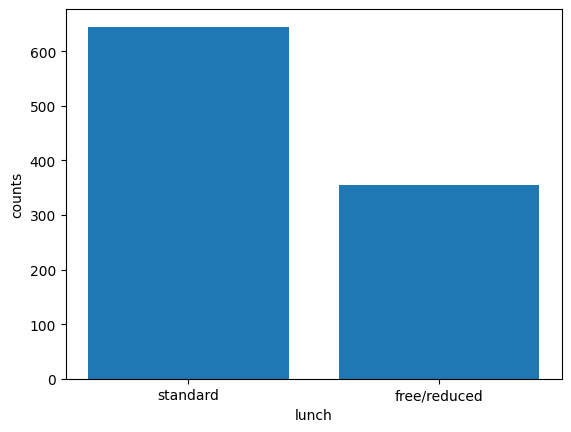

In [12]:
plt.subplot(1,1,1)

plt.bar(x=stud_data.lunch.value_counts().index,height=stud_data.lunch.value_counts())

plt.xlabel('lunch')
plt.ylabel('counts')
plt.show()

## test_preparation_course

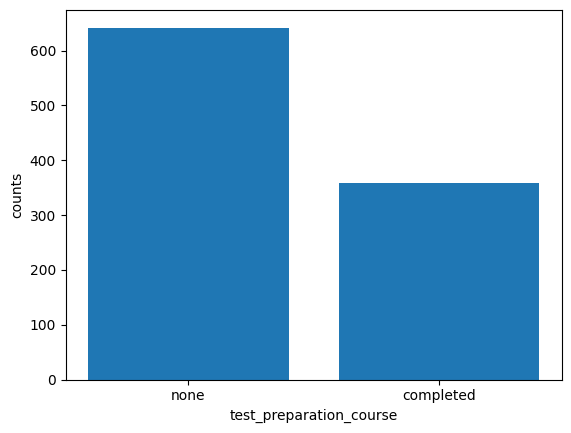

In [13]:
plt.subplot(1,1,1)

plt.bar(x=stud_data.test_preparation_course.value_counts().index,height=stud_data.test_preparation_course.value_counts())

plt.xlabel('test_preparation_course')
plt.ylabel('counts')
plt.show()

### score

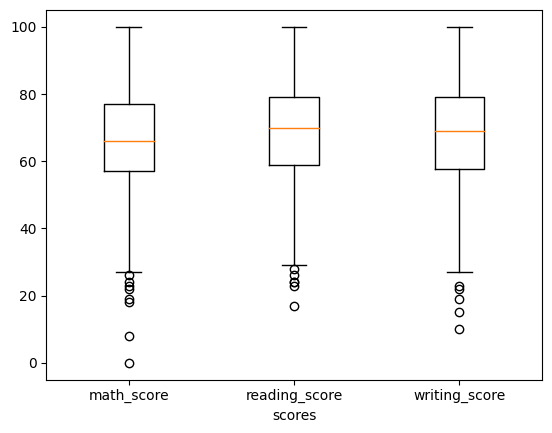

In [14]:
f,ax = plt.subplots(1,1)
ax.boxplot(stud_data[['math_score','reading_score','writing_score']],labels=['math_score','reading_score','writing_score'])
ax.set_xlabel('scores')
plt.show()

## creating new feature average score

In [15]:
stud_data['average'] = stud_data.math_score + stud_data.reading_score + stud_data.writing_score / 3

In [16]:
stud_data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,168.666667
1,female,group C,some college,standard,completed,69,90,88,188.333333
2,female,group B,master's degree,standard,none,90,95,93,216.000000
3,male,group A,associate's degree,free/reduced,none,47,57,44,118.666667
4,male,group C,some college,standard,none,76,78,75,179.000000
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,218.666667
996,male,group C,high school,free/reduced,none,62,55,55,135.333333
997,female,group C,high school,free/reduced,completed,59,71,65,151.666667
998,female,group D,some college,standard,completed,68,78,77,171.666667


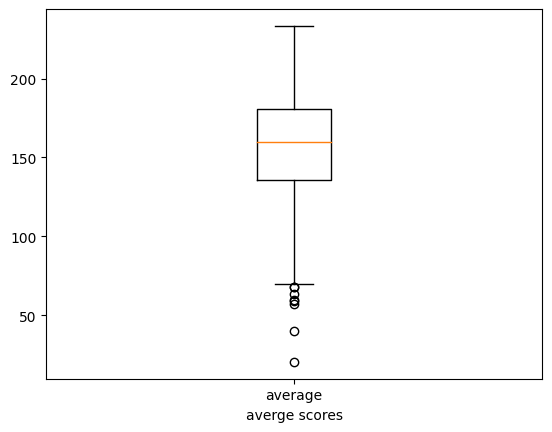

In [17]:
f,ax = plt.subplots(1,1)
ax.boxplot(stud_data[['average']],labels=['average'])
ax.set_xlabel('averge scores')
plt.show()

### Comparing average score vs gender

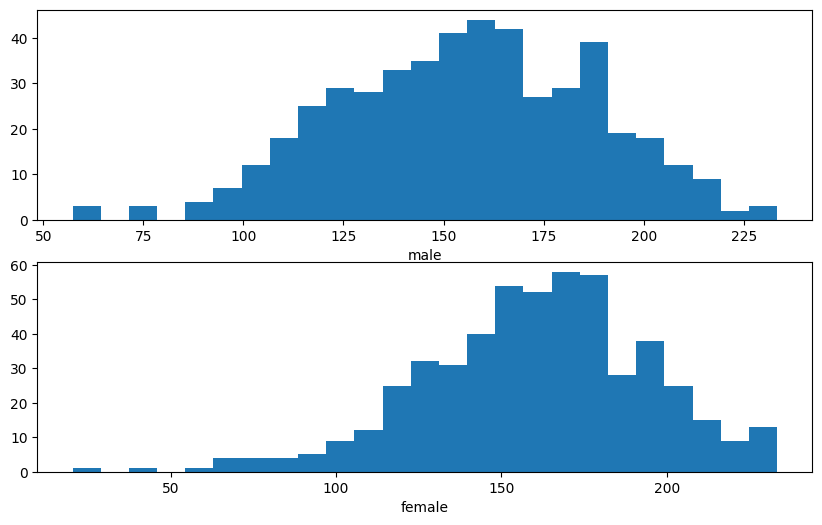

In [19]:
f,ax= plt.subplots(2,1)
f.set_size_inches(10,6)
ax[0].hist(stud_data[stud_data.gender == 'male'].average,bins=25)
ax[1].hist(stud_data[stud_data.gender == 'female'].average,bins=25)
ax[0].set_xlabel('male')
ax[1].set_xlabel('female')
plt.show()

- ### female have higher scoring average than men

### averege score vs race_ethnicity

In [62]:
pd.pivot_table(stud_data,columns=['race_ethnicity'],values=['average'],aggfunc='mean')

race_ethnicity,group A,group B,group C,group D,group E
average,147.194757,152.67193,156.176594,160.774809,170.652381


In [72]:
groupa = stud_data[stud_data['race_ethnicity'] == 'group A'].average
groupb = stud_data[stud_data['race_ethnicity'] == 'group B'].average
groupc = stud_data[stud_data['race_ethnicity'] == 'group C'].average
groupd = stud_data[stud_data['race_ethnicity'] == 'group D'].average
groupe = stud_data[stud_data['race_ethnicity'] == 'group E'].average

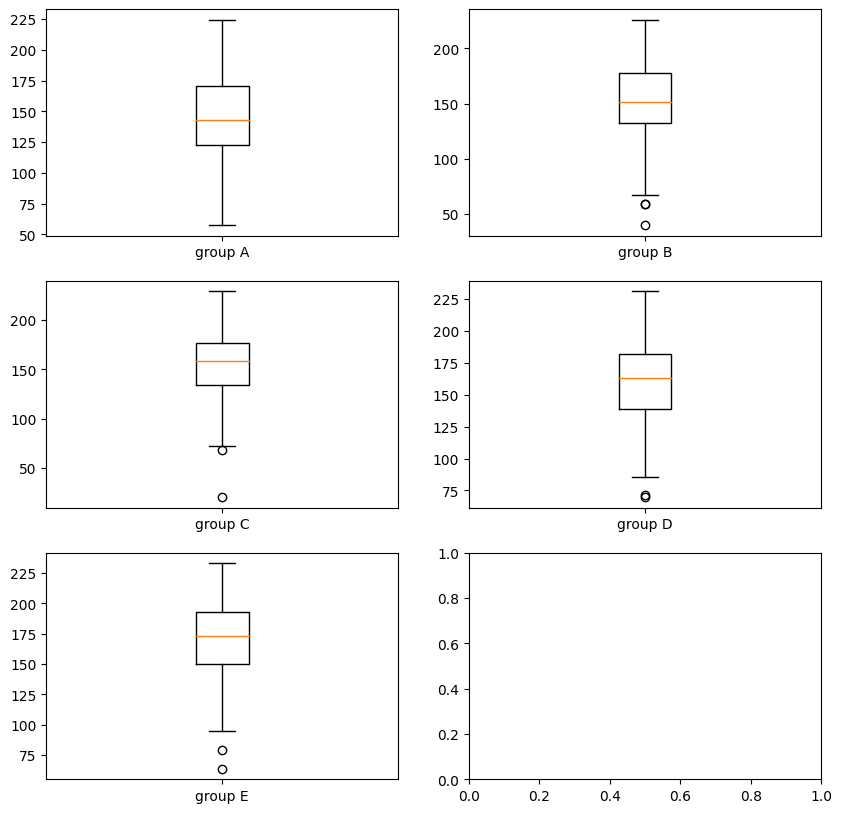

In [88]:
f,ax = plt.subplots(3,2)
f.set_size_inches(10,10)
ax[0][0].boxplot(groupa,labels=['group A'])
ax[0][1].boxplot(groupb,labels=['group B'])
ax[1][0].boxplot(groupc,labels=['group C'])
ax[1][1].boxplot(groupd,labels=['group D'])
ax[2][0].boxplot(groupe,labels=['group E'])
plt.show()

- group E has greater average score 

- group A has greater variance in average score and mean of the score is on lower side

### average vs test_preparation_course

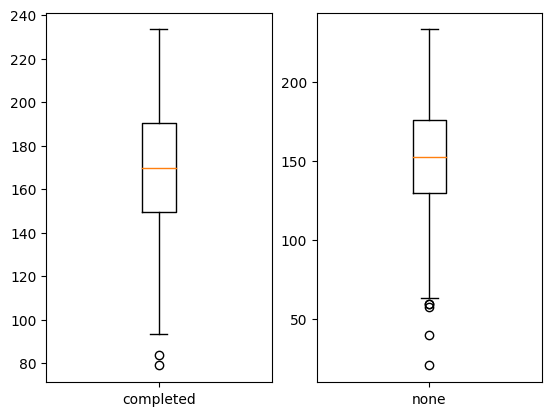

In [94]:
f,ax = plt.subplots(1,2)
ax[0].boxplot(stud_data[stud_data.test_preparation_course == 'completed'].average,labels=['completed'])
ax[1].boxplot(stud_data[stud_data.test_preparation_course == 'none'].average,labels=['none'])
plt.show()

- students who have completed test preparation course have better score average , and there variance is also very good